In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# from tabulate import tabulate
import pandas as pd

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


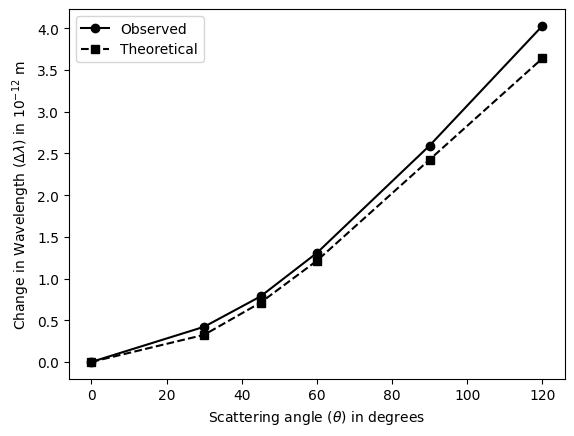

In [15]:
data = pd.read_excel('data.xlsx', sheet_name='al')
y1 = data['delta lambda exp']
y2 = data['delta lambda th']
x = data['theta']

plt.plot(x, y1, '-ko', label='Observed')
plt.plot(x, y2, '--ks', label='Theoretical')
plt.xlabel(r'Scattering angle ($\theta$) in degrees')
plt.ylabel(r'Change in Wavelength ($\Delta \lambda$) in $10^{-12}$ m')
plt.legend()
plt.savefig('images/al.eps')

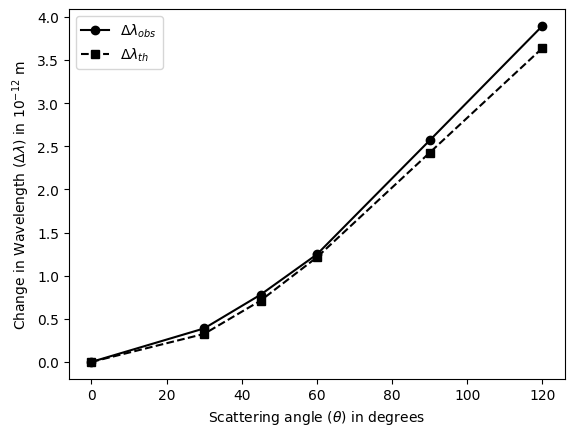

In [41]:
data = pd.read_excel('data.xlsx', sheet_name='cu')
y1 = data['delta lambda exp']
y2 = data['delta lambda th']
y3 = data['Delta E obs']
y4 = data['Delta E th']
x = data['theta']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, '-ko', label=r'$\Delta \lambda_{obs}$')
ax1.plot(x, y2, '--ks', label=r'$\Delta \lambda_{th}$')
ax1.set_xlabel(r'Scattering angle ($\theta$) in degrees')
ax1.set_ylabel(r'Change in Wavelength ($\Delta \lambda$) in $10^{-12}$ m')
plt.legend()
# ax2 = ax1.twinx() 
# ax2.set_ylabel(r'$E$')
# ax2.plot(x, y3, '-ko', label=r'$E_\theta$ observed')
# ax2.plot(x, y4, '--ks', label='Theoretical')
# ax1.legend()
plt.legend()
# plt.savefig('images/cu.eps')

In [ ]:
data = pd.read_excel('data.xlsx', sheet_name='cu')
y1 = data['delta lambda exp']
y2 = data['delta lambda th']
y3 = data['Delta E obs']
y4 = data['Delta E th']
x = data['theta']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, '-ko', label=r'$\Delta \lambda_{obs}$')
ax1.plot(x, y2, '--ks', label=r'$\Delta \lambda_{th}$')
ax1.set_xlabel(r'Scattering angle ($\theta$) in degrees')
ax1.set_ylabel(r'Change in Wavelength ($\Delta \lambda$) in $10^{-12}$ m')
plt.legend()
# ax2 = ax1.twinx() 
# ax2.set_ylabel(r'$E$')
# ax2.plot(x, y3, '-ko', label=r'$E_\theta$ observed')
# ax2.plot(x, y4, '--ks', label='Theoretical')
# ax1.legend()
plt.legend()
# plt.savefig('images/cu.eps')

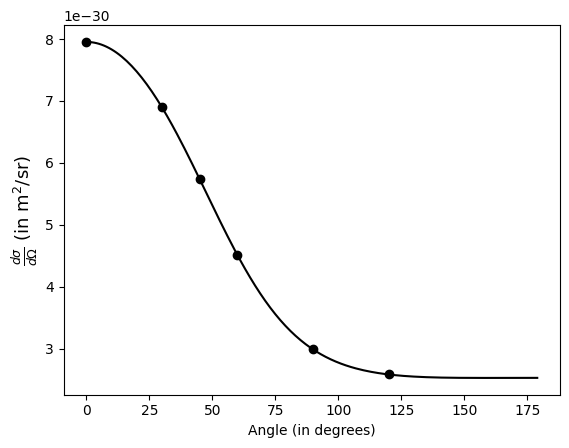

In [24]:
x = np.arange(0, 180, 1)

def cross_section(x):
    x = np.radians(x)
    cosx = np.cos(x)
    gamma = 662/551
    y1 = (1+cosx**2)/2
    y2 = 1/(1+gamma*(1-cosx)**2)
    y3 = (gamma*(1-cosx))**2/((1+cosx**2)*(1+gamma*(1-cosx)))
    y = 2.82e-15**2*y1*y2*(y3+1)
    return y

plt.plot(x, cross_section(x), '-k')
plt.xlabel('Angle (in degrees)')
plt.ylabel(r'$\frac{d\sigma}{d\Omega}$ (in m$^2$/sr)', fontsize=13)
angs = [0, 30, 45, 60, 90, 120]
plt.plot(angs, cross_section(angs), 'ko')
plt.savefig('images/cross-section.eps')

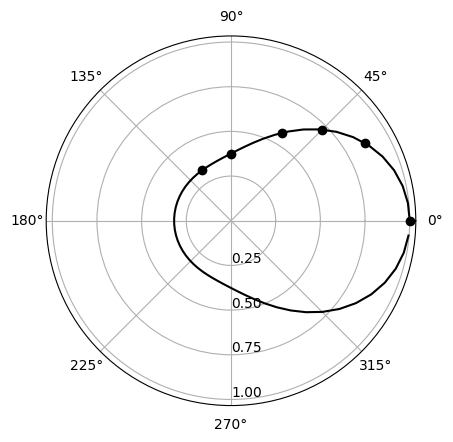

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angs, cross_section(angs), 'ko')
ax.plot(x, cross_section(x), '-k')
ax.set_rticks([0.25, 0.5, 0.75,1])  # Less radial ticks
ax.set_rlabel_position(-90)
ax.grid(True)